# All Campuses & Years - Model (with Important Features)

**Model used: Random Forest Classifier**

_This model is only runned with the most important features that Gridsearch have gave us on our previous step (Train our model with all variables)._

**Index**

1. [Environment](#Environment)
2. [Feature Preprocessing ](#FeaturePreprocessing )
3. [Model](#Model)
    - Gridsearch
    - Random Forest Classifier (with best params)
    - Feature Importance
    - Tree Visualization


4. [Conclusions](#Conclusions)

## Environment

#### Import libraries

In [1]:
import pandas as pd
import numpy as np

import math
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.under_sampling import TomekLinks


from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

from sklearn.ensemble import RandomForestClassifier

#### Import data

In [9]:
all_apps = pd.read_csv("apps_allYears_clean_selCols_addCols_tra.csv")

In [10]:
all_apps.shape

(28723, 71)

In [11]:
all_apps.head()

Bootcamp Year  Drop  Stage Duration  Paid Deposit  Scholarship  Discount  \
0              2     0          1125.0             0            0         0   
1              2     0           875.0             0            0         0   
2              2     0           952.0             0            0         0   
3              4     0           147.0             0            0         0   
4              2     0          1125.0             0            0         1   

   Time Conversion - days  Time between Created Date and Start Date - days  \
0                     110                                              133   
1                      39                                               97   
2                     143                                              227   
3                       0                                               34   
4                     388                                              421   

   Discount(%)  Creater Month  ...  HearAboutUs_TV and/or radio  \
0         0.00              9  ...                          0.0   
1         0.00              7  ...                          0.0   
2         0.00              1  ...                          0.0   
3         0.00              7  ...                          0.0   
4         0.09              9  ...                          0.0   

   HearAboutUs_courseReport  HearAboutUs_google  \
0                       0.0                 0.0   
1                       0.0                 1.0   
2                       0.0                 1.0   
3                       0.0                 0.0   
4                       0.0                 0.0   

   HearAboutUs_newspaperOrMagazine  HearAboutUs_newspaper_or_magazine  \
0                              0.0                                0.0   
1                              0.0                                0.0   
2                              0.0                                0.0   
3                              0.0                                0.0   
4                              0.0                                0.0   

   HearAboutUs_other  HearAboutUs_quora  HearAboutUs_salon  HearAboutUs_sbahn  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   HearAboutUs_switchup  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 71 columns]

In [12]:
apps=all_apps[["Time Conversion - days","Discount(%)","Time between Created Date and Start Date - days",
     "Stage Duration","Discount","Creater Month","Bootcamp Year","HearAboutUs_Social Media",
     "HearAboutUs_Referral","Creater Quarter","Paid Deposit"]]

## Feature Preprocessing 
It turns raw data into a one that is usable by a machine learning model.

In [13]:
features_to_encode = apps.columns[apps.dtypes==object].tolist()

In [14]:
col_transformer_e = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'), features_to_encode),
    remainder="passthrough")

## Model

In [15]:
X = apps.drop(['Paid Deposit'],axis=1)
y = apps['Paid Deposit']

### Gridsearch

In [16]:
def gridsearch(X,y):
    
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 2, stop = 30, num = 5)]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(5, 20, num = 5)]
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    
    # Create Params
    param_grid = {
    'randomforestclassifier__bootstrap': bootstrap,
    'randomforestclassifier__max_features': max_features,
    'randomforestclassifier__max_depth': max_depth,
    'randomforestclassifier__min_samples_leaf': min_samples_leaf,
    'randomforestclassifier__min_samples_split': min_samples_split,
    'randomforestclassifier__n_estimators': n_estimators
    }
    
    
    # Create a based model
    rf_classifier = RandomForestClassifier()

    pipe = make_pipeline(col_transformer_e, TomekLinks(sampling_strategy='majority'), rf_classifier)
    
    
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    grid_search.fit(X, y)
    
    return grid_search.best_estimator_

In [17]:
best_model= gridsearch(X,y)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  9.6min finished


In [18]:
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('tomeklinks', TomekLinks(sampling_strategy='majority')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, max_features='sqrt',
                                        min_samples_leaf=4, n_estimators=16))])

### Random Forest Classifier
Using its best params that we got from Gridsearch

In [19]:
def rfc_report(X, y, model, target_names = ['Not Paid Deposit', 'Paid Deposit']):
    results = []
    
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    

    cv = cross_val_score(model, X, y, cv=StratifiedKFold(), scoring = "accuracy")
    
    clf = model.fit(X, y)
    y_pred=clf.predict(X)
        
    print("Classification Report")
    print(classification_report(y, y_pred, target_names=target_names))
    print("Confusion_matrix \n",confusion_matrix(y, y_pred),"\n")
        
    results.append(cv)
    
    final_df = pd.DataFrame(cv)
    final_df.rename(columns={0:'Cross Validaton Score'},inplace=True)
    
    print(final_df)

In [20]:
X = apps_trans.drop(['Paid Deposit'],axis=1)
y = apps_trans['Paid Deposit']
rfc_report(X, y, best_model)

Classification Report
                  precision    recall  f1-score   support

Not Paid Deposit       0.86      0.99      0.92     23556
    Paid Deposit       0.84      0.28      0.42      5167

        accuracy                           0.86     28723
       macro avg       0.85      0.64      0.67     28723
    weighted avg       0.86      0.86      0.83     28723

Confusion_matrix 
 [[23275   281]
 [ 3702  1465]] 

   Cross Validaton Score
0               0.852567
1               0.848216
2               0.858138
3               0.872214
4               0.860550


**Interpretation**

- **The Classification Report:**
    - **Accuracy** tells you what percentage of the predictions are correct.
    - **Precision** tells us the following: from the positive predictions I have made, what percentage are positive.
    - **Recall** (opposed to precision), is useful when the cost of a false negative is high. It tells us: of all the positive predictions, what percentage confirms the predicition.
    - **F1-score** seeks a balance between precision and recall.


- **Confusion_matrix**
    - T0 (True Not Paid Deposit): 23291 
    - F0 (False Not Paid Deposit): 281
    - T1 (True Paid Deposit): 1465
    - F1 (False Paid Deposit): 3702


- **Cross Validaton Score**

    It is the technique for assessing how the statistical analysis generalises to an independent data set.It is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data.

### Feature Importance

In [21]:
def rf_feature_importance(model):
    
    rf=best_model.steps[2][1]
    
    ct=best_model.steps[0][1]
    ct_cols=ct.get_feature_names()
    
    importances = pd.DataFrame({'feature':ct.get_feature_names(),'importance':np.round(rf.feature_importances_,3)})
    importances = importances.sort_values('importance',ascending=False).set_index('feature')
    
    top20=importances[:20]

    top20.plot.barh()
    plt.title('Top20 RF Feature Importance')

    plt.show()

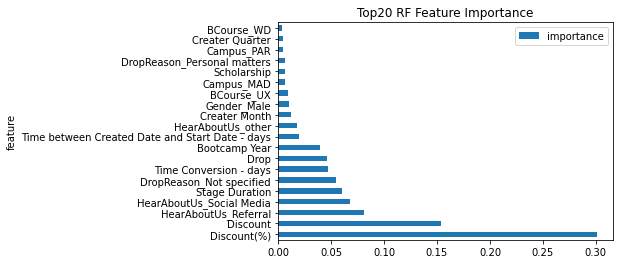

In [22]:
rf_feature_importance(best_model)

#### TreeVisualization

Visualizing 1 of the trees

In [36]:
# Extract single tree
feature_names = best_model.steps[0][1].get_feature_names()
target_names = ['Not Paid Deposit', 'Paid Deposit']
estimator = best_model.steps[2][1].estimators_[0]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'AllYC_M_FI_tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'AllYC_M_FI_tree.png')

It is definetly hard to see this tree so in case you want to take a look, please see the pgn saved as AllYC_M_FI_tree.

## Conclusions

After modeling with only the selected features from our previous random forest results, we find that the model loses a bit of accurancy when it comes to predict the Paid Deposits. We might have to keep playing with different variables to find the number of top features to use in our model and have a better result.